# Image Clustering

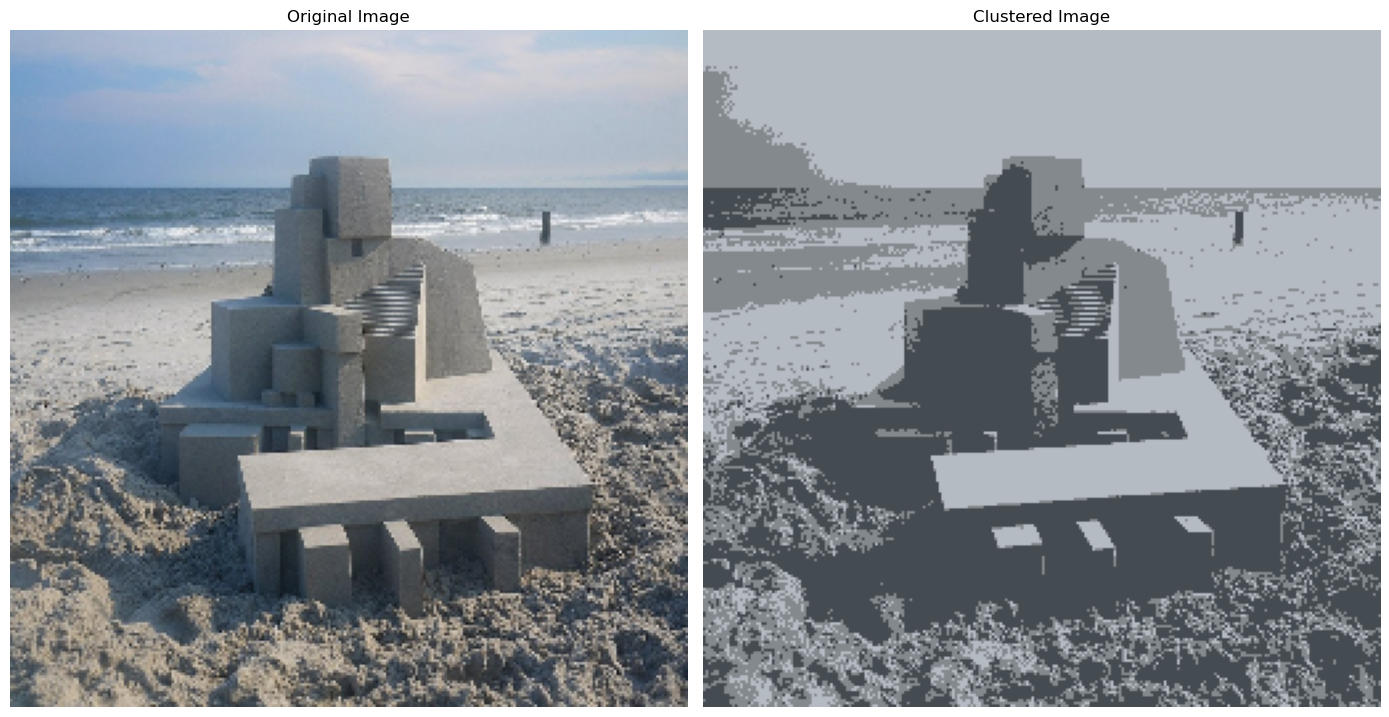

In [10]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the image and preprocess
image_path = "test_Image.jpg"  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize for faster processing
image_resized = cv2.resize(image, (256, 256))
image_flattened = image_resized.reshape((-1, 3))

# Step 2: Apply k-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(image_flattened)
clustered_image = kmeans.labels_.reshape(image_resized.shape[:2])

# Step 3: Map cluster labels to colors
clustered_colors = np.zeros_like(image_resized)
for i in range(k):
    clustered_colors[clustered_image == i] = kmeans.cluster_centers_[i]

# Step 4: Plot results
plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_resized)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Clustered Image")
plt.imshow(clustered_colors.astype(np.uint8))
plt.axis("off")

plt.tight_layout()
plt.show()


# Edge detection

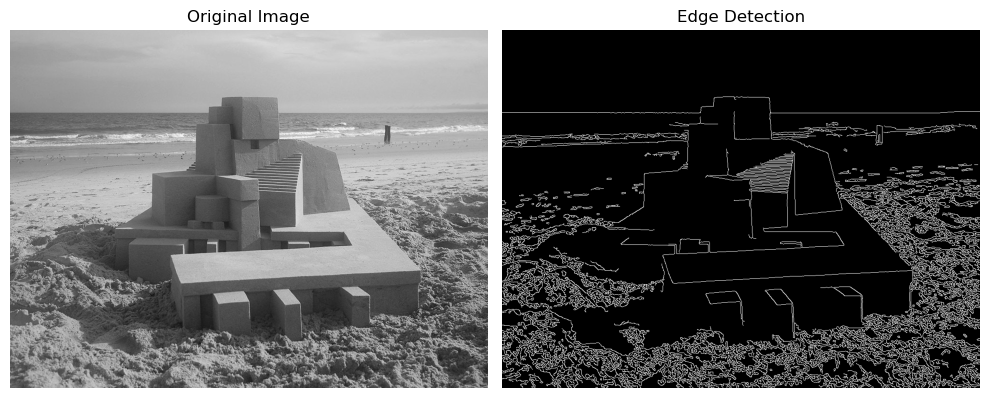

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the uploaded image
img_path = "test_Image.jpg"  # Replace this with your uploaded image's path

# Step 1: Load the image in grayscale
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Step 3: Detect edges using the Canny Edge Detector
edges = cv2.Canny(blurred, 50, 150)

# Step 4: Display results using Matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

# Edge-detected image
plt.subplot(1, 2, 2)
plt.title("Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


# Foreground Extraction

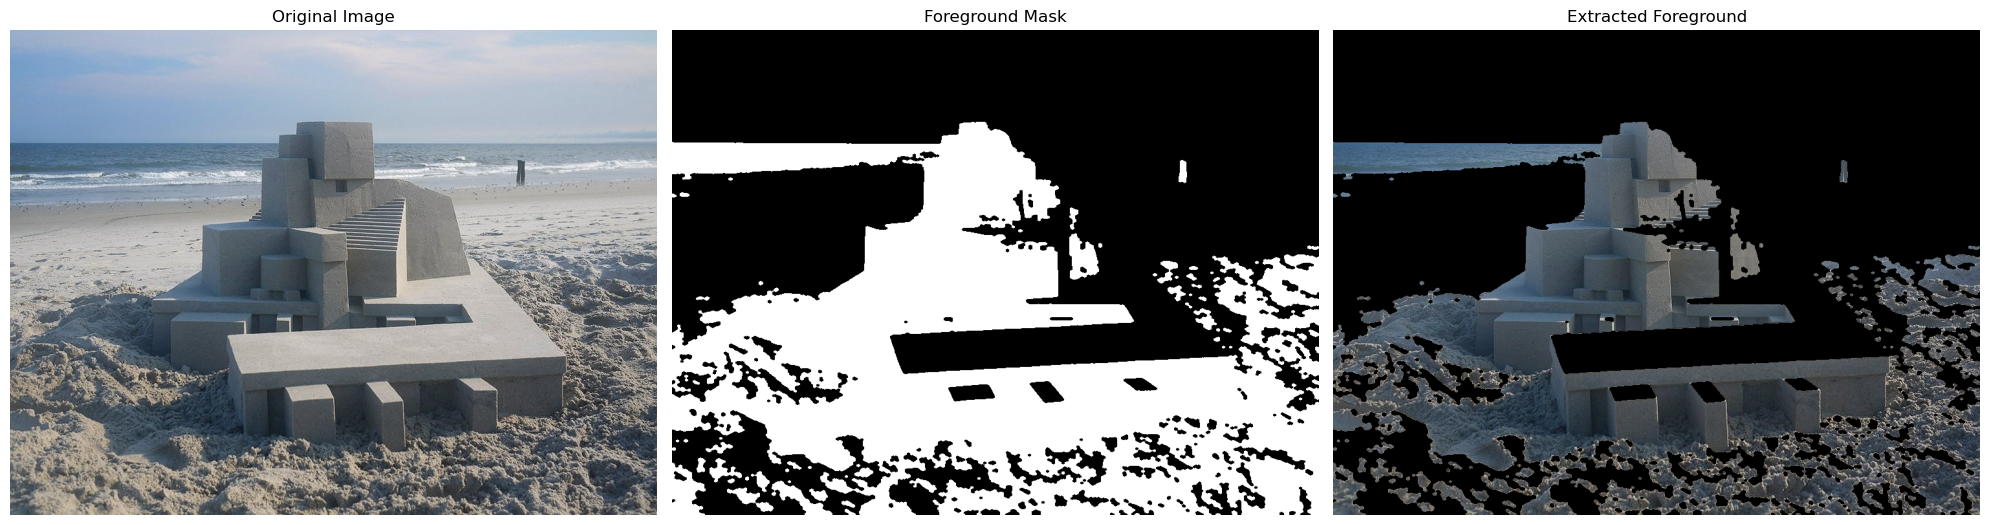

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the uploaded image
img_path = "test_Image.jpg"  # Replace this with your uploaded image's path

# Step 1: Load the image
image = cv2.imread(img_path)

# Step 2: Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 4: Perform background subtraction using thresholding
_, mask = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Step 5: Refine the mask using morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Step 6: Invert the mask if necessary
foreground_mask = cv2.bitwise_not(mask)

# Step 7: Extract the foreground
foreground = cv2.bitwise_and(image, image, mask=foreground_mask)

# Step 8: Display results using Matplotlib
plt.figure(figsize=(20, 30))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Foreground mask
plt.subplot(1, 3, 2)
plt.title("Foreground Mask")
plt.imshow(foreground_mask, cmap="gray")
plt.axis("off")

# Extracted foreground
plt.subplot(1, 3, 3)
plt.title("Extracted Foreground")
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()


# Image Segmentations (variable K values)

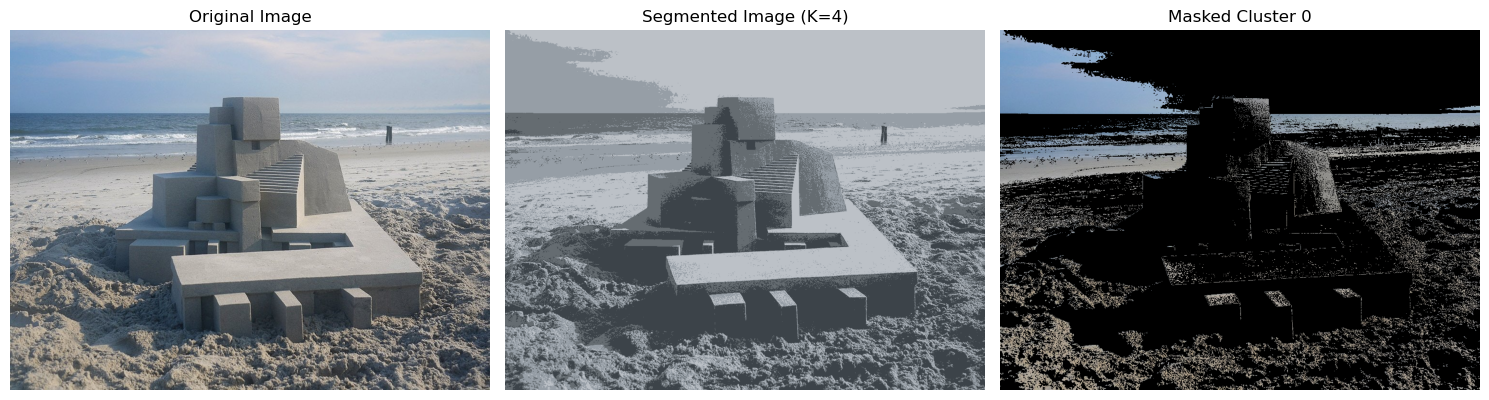

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the uploaded image
img_path = "test_Image.jpg"  # Replace this with your uploaded image's path

# Step 1: Load the image
image = cv2.imread(img_path)

# Step 2: Convert the image to RGB (for visualization in matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Reshape the image to a 2D array of pixels and 3 color values (R, G, B)
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)  # Convert to float32 for k-means

# Step 4: Define criteria for k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Step 5: Number of clusters (K)
k = 4

# Step 6: Perform k-means clustering
_, labels, centers = cv2.kmeans(
    pixel_values,
    k,
    None,
    criteria,
    10,
    cv2.KMEANS_RANDOM_CENTERS
)

# Step 7: Convert the centers back to 8-bit values
centers = np.uint8(centers)

# Step 8: Map labels to the corresponding cluster centers
segmented_image = centers[labels.flatten()]

# Step 9: Reshape the segmented image back to the original image shape
segmented_image = segmented_image.reshape(image_rgb.shape)

# Step 10: Create a mask for a specific cluster (e.g., cluster 0)
cluster = 0
masked_image = np.copy(image_rgb)
masked_image = masked_image.reshape((-1, 3))
masked_image[labels.flatten() != cluster] = [0, 0, 0]  # Set non-cluster pixels to black
masked_image = masked_image.reshape(image_rgb.shape)

# Step 11: Display the results
plt.figure(figsize=(15, 8))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis("off")

# Segmented image
plt.subplot(1, 3, 2)
plt.title(f"Segmented Image (K={k})")
plt.imshow(segmented_image)
plt.axis("off")

# Masked cluster
plt.subplot(1, 3, 3)
plt.title(f"Masked Cluster {cluster}")
plt.imshow(masked_image)
plt.axis("off")

plt.tight_layout()
plt.show()


Enter the number of clusters (k):  10


Segmented image saved as segmented_image.jpg


Select a cluster (0 to 9):  7


Masked cluster 7 image saved as masked_cluster_7.jpg


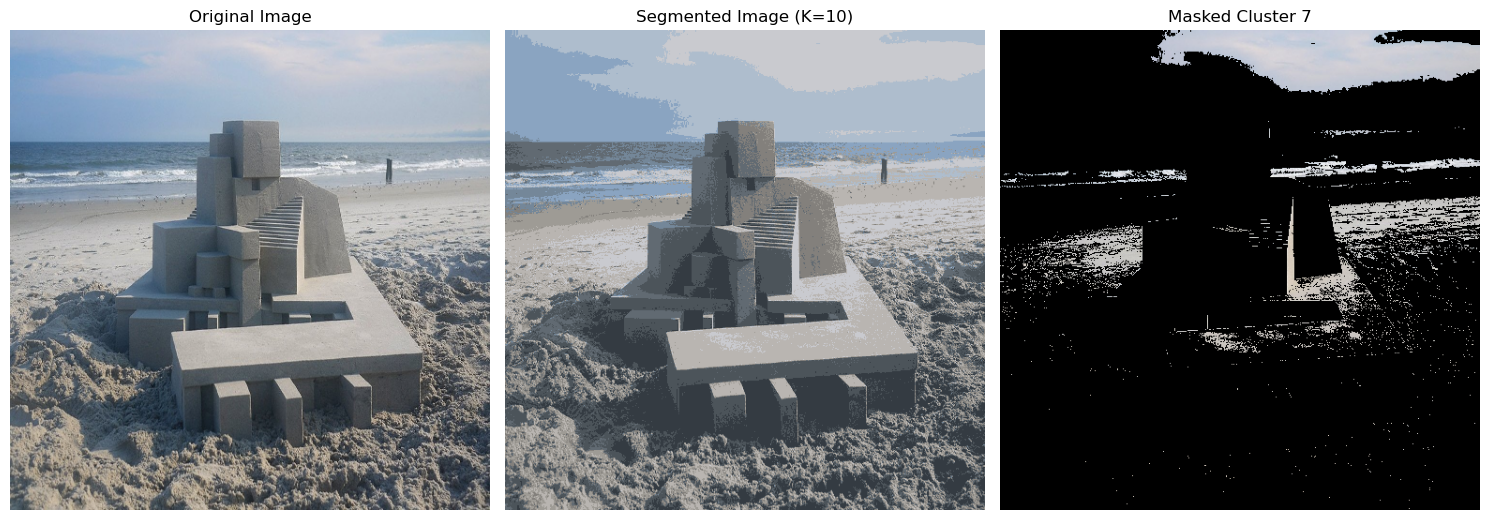


Displaying all clusters:


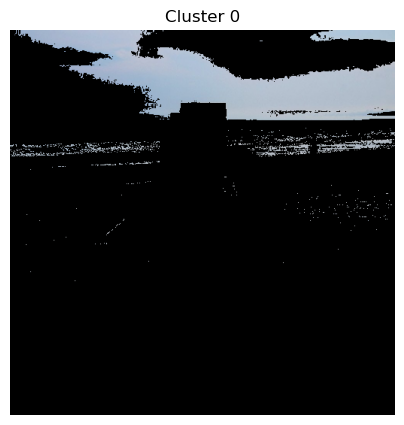

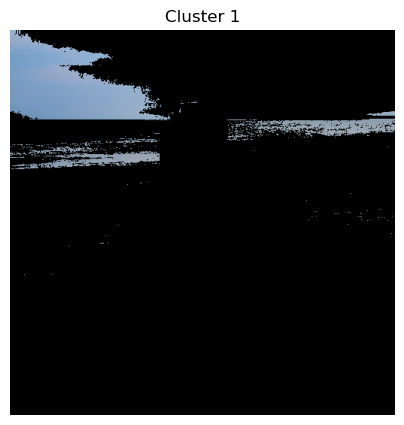

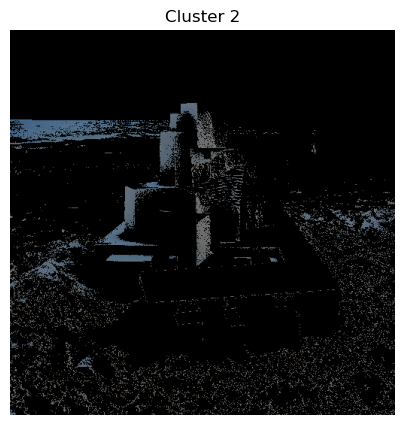

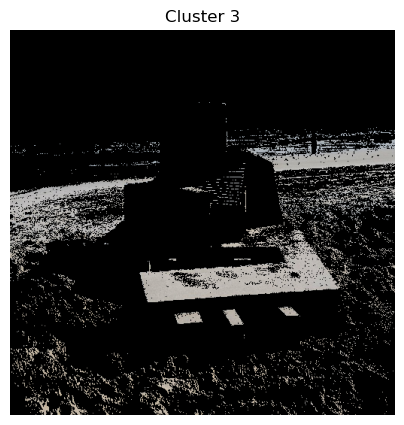

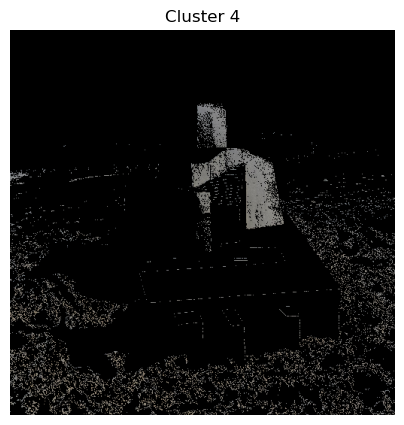

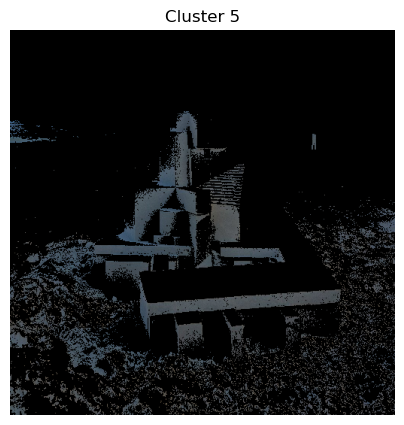

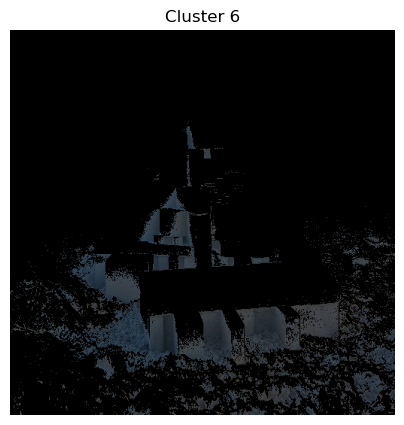

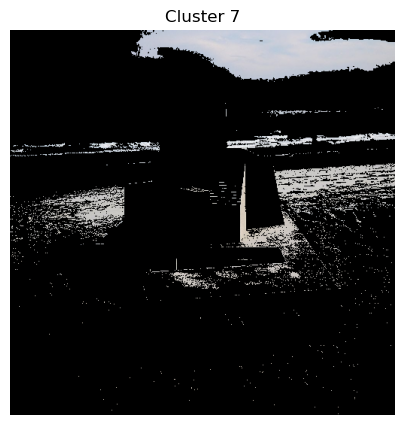

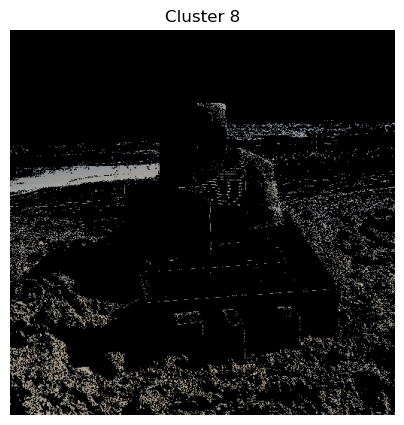

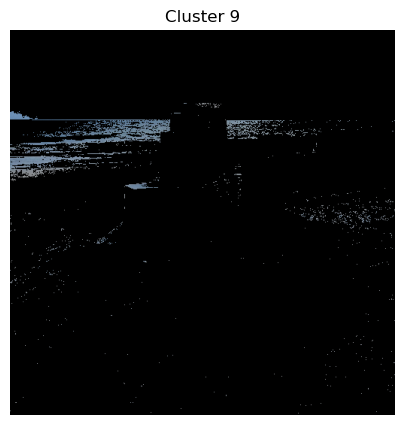

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Define the image path and check for its existence
img_path = "test_Image.jpg"  # Replace this with your uploaded image's path

if not os.path.exists(img_path):
    raise FileNotFoundError(f"Image file '{img_path}' not found!")

# Step 2: Load the image
image = cv2.imread(img_path)

# Step 3: Convert the image to RGB (for visualization in matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 4: Resize the image for performance optimization
resize_dim = (512, 512)  # Define a smaller resolution for faster processing
image_rgb = cv2.resize(image_rgb, resize_dim)

# Step 5: Reshape the image to a 2D array of pixels and 3 color values (R, G, B)
pixel_values = image_rgb.reshape((-1, 3)).astype(np.float32)

# Step 6: Define criteria for k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Step 7: Accept user input for number of clusters (k) and validate
try:
    k = int(input("Enter the number of clusters (k): "))
    if k <= 0:
        raise ValueError("Number of clusters must be greater than 0.")
except ValueError as e:
    raise ValueError("Invalid input for the number of clusters. Please enter a positive integer.") from e

# Step 8: Perform k-means clustering
_, labels, centers = cv2.kmeans(
    pixel_values,
    k,
    None,
    criteria,
    10,
    cv2.KMEANS_RANDOM_CENTERS
)

# Step 9: Convert cluster centers back to uint8 values and map labels to cluster centers
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()].reshape(image_rgb.shape)

# Step 10: Save the segmented image
segmented_image_path = "segmented_image.jpg"
cv2.imwrite(segmented_image_path, cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR))
print(f"Segmented image saved as {segmented_image_path}")

# Step 11: Mask specific cluster and allow user to select a cluster dynamically
try:
    cluster = int(input(f"Select a cluster (0 to {k-1}): "))
    if cluster < 0 or cluster >= k:
        raise ValueError(f"Cluster index must be in range 0 to {k-1}.")
except ValueError as e:
    raise ValueError("Invalid input for cluster index.") from e

masked_image = np.copy(image_rgb).reshape((-1, 3))
masked_image[labels.flatten() != cluster] = [0, 0, 0]  # Set non-cluster pixels to black
masked_image = masked_image.reshape(image_rgb.shape)

# Save the masked image
masked_image_path = f"masked_cluster_{cluster}.jpg"
cv2.imwrite(masked_image_path, cv2.cvtColor(masked_image, cv2.COLOR_RGB2BGR))
print(f"Masked cluster {cluster} image saved as {masked_image_path}")

# Step 12: Display results
plt.figure(figsize=(15, 8))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis("off")

# Segmented image
plt.subplot(1, 3, 2)
plt.title(f"Segmented Image (K={k})")
plt.imshow(segmented_image)
plt.axis("off")

# Masked cluster
plt.subplot(1, 3, 3)
plt.title(f"Masked Cluster {cluster}")
plt.imshow(masked_image)
plt.axis("off")

plt.tight_layout()
plt.show()

# Step 13: Display all clusters
print("\nDisplaying all clusters:")
for c in range(k):
    temp_mask = np.copy(image_rgb).reshape((-1, 3))
    temp_mask[labels.flatten() != c] = [0, 0, 0]  # Set non-cluster pixels to black
    temp_mask = temp_mask.reshape(image_rgb.shape)
    
    plt.figure(figsize=(5, 5))
    plt.title(f"Cluster {c}")
    plt.imshow(temp_mask)
    plt.axis("off")
    plt.show()


# Image segmentation by clustering (K=3)

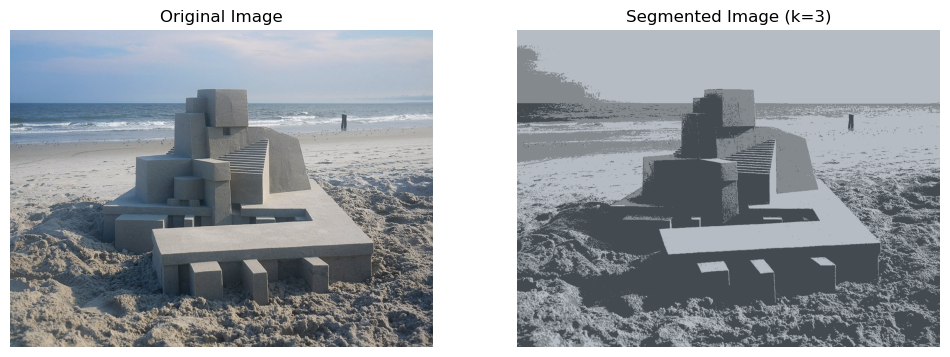

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = "test_Image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (height * width, channels)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply K-means clustering
# Criteria: (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters (segments)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8 (pixel values)
centers = np.uint8(centers)

# Map the labels to the center values to create the segmented image
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (k={k})")
plt.imshow(segmented_image)
plt.axis("off")

plt.show()


# Image segmentation by clustering (K=2)

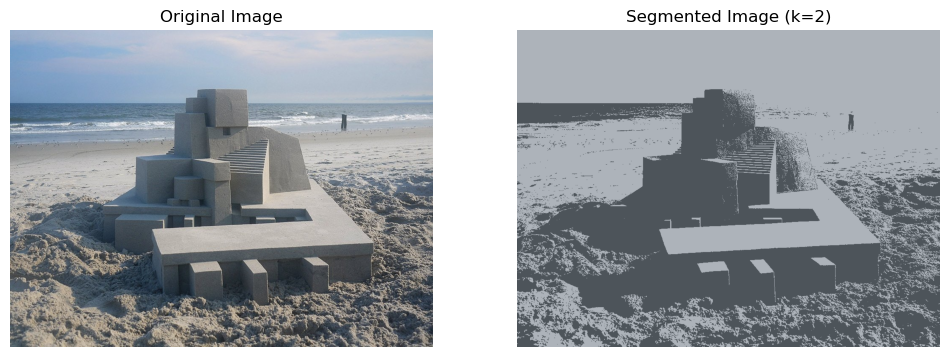

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = "test_Image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (height * width, channels)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply K-means clustering
# Criteria: (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2  # Set the number of clusters to 2
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8 (pixel values)
centers = np.uint8(centers)

# Map the labels to the center values to create the segmented image
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (k={k})")
plt.imshow(segmented_image)
plt.axis("off")

plt.show()

Optimal number of clusters (k) found: 8


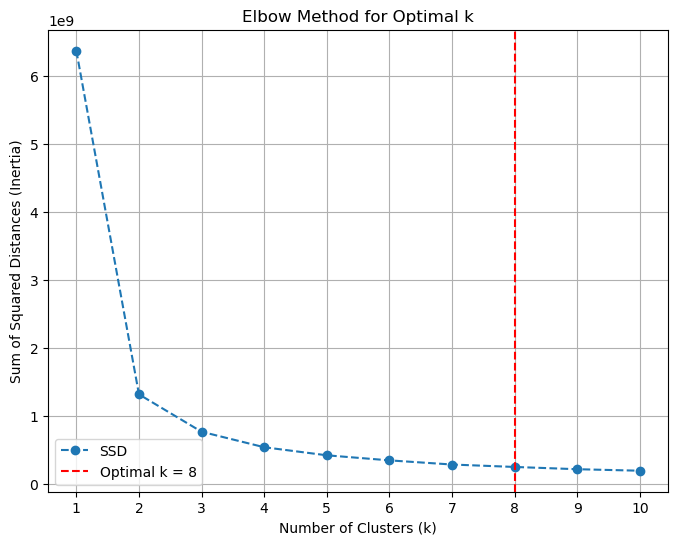

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = "test_Image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (height * width, channels)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria for K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# List to store the sum of squared distances (inertia)
ssd = []

# Test different values of k (from 1 to 10)
k_values = range(1, 11)
for k in k_values:
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # Compute the sum of squared distances (SSD)
    ssd.append(np.sum((pixel_values - centers[labels.flatten()]) ** 2))

# Find the optimal k using the Elbow Method (maximum curvature)
def find_elbow(ssd, k_values):
    # Compute the second derivative of SSD
    diff = np.diff(ssd, 2)
    optimal_k = k_values[np.argmin(diff) + 1]
    return optimal_k

# Get the optimal k value
optimal_k = find_elbow(ssd, k_values)
print(f"Optimal number of clusters (k) found: {optimal_k}")

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, ssd, marker='o', linestyle='--', label='SSD')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()